In [1]:
try:
    get_ipython()
    print("¡Estás en un entorno Jupyter!")
except:
    print("Este entorno no es Jupyter.")


¡Estás en un entorno Jupyter!


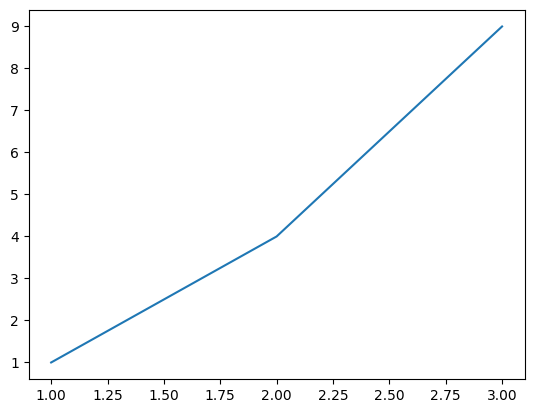

In [1]:

import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()


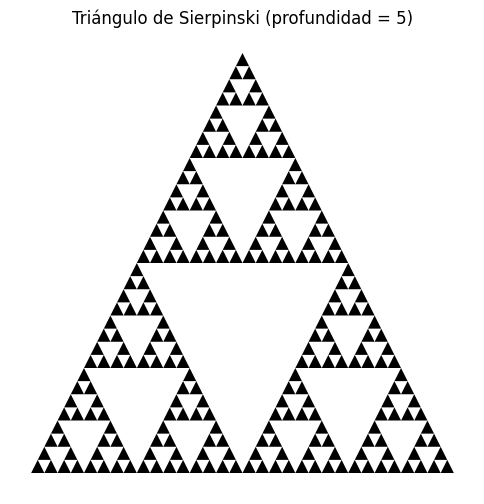

In [3]:
import matplotlib.pyplot as plt

def sierpinski(p1, p2, p3, depth):
    """Dibuja un triángulo de Sierpinski recursivo."""
    if depth == 0:
        # Dibuja el triángulo completo en negro
        plt.fill([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], 'black')
    else:
        # Calcula puntos medios
        mid12 = [(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]
        mid23 = [(p2[0]+p3[0])/2, (p2[1]+p3[1])/2]
        mid31 = [(p3[0]+p1[0])/2, (p3[1]+p1[1])/2]
        
        # Llamadas recursivas para cada subtriángulo
        sierpinski(p1, mid12, mid31, depth-1)
        sierpinski(mid12, p2, mid23, depth-1)
        sierpinski(mid31, mid23, p3, depth-1)

# Parámetros iniciales
p1 = [0, 0]
p2 = [1, 0]
p3 = [0.5, 0.866]  # Altura del triángulo equilátero

plt.figure(figsize=(6,6))
sierpinski(p1, p2, p3, depth=5)  # Puedes cambiar el valor de depth
plt.axis('off')
plt.title("Triángulo de Sierpinski (profundidad = 5)")
plt.show()


Recta ajustada: y = 1.9500x + 1.5900


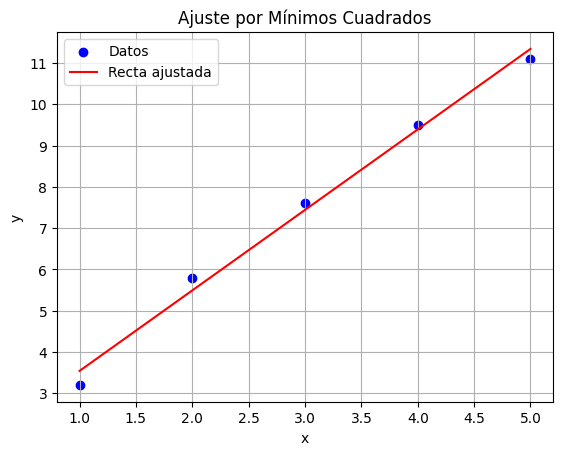

In [4]:
#Ajuste por medio de mínimos cuadrados

#Definimos primero un conjunto de datos

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([1, 2, 3, 4, 5])
y = np.array([3.2, 5.8, 7.6, 9.5, 11.1])
n = len(x)

# Cálculos necesarios
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x**2)
sum_xy = np.sum(x * y)

# Coeficientes de la recta
a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - a * sum_x) / n

print(f"Recta ajustada: y = {a:.4f}x + {b:.4f}")

# Graficamos los datos y la recta ajustada
plt.scatter(x, y, label="Datos", color="blue")
plt.plot(x, a * x + b, label="Recta ajustada", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por Mínimos Cuadrados")
plt.legend()
plt.grid(True)
plt.show()


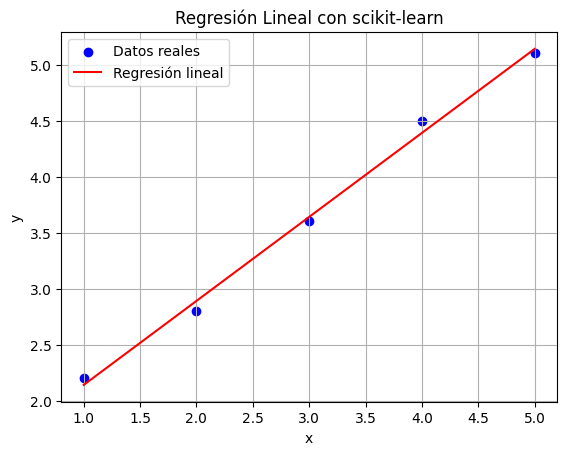

Recta: y = 0.7500x + 1.3900


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

# Modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(x, y)

# Predicción
y_pred_lineal = modelo_lineal.predict(x)

# Visualización
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(x, y_pred_lineal, label="Regresión lineal", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal con scikit-learn")
plt.legend()
plt.grid(True)
plt.show()

print(f"Recta: y = {modelo_lineal.coef_[0]:.4f}x + {modelo_lineal.intercept_:.4f}")


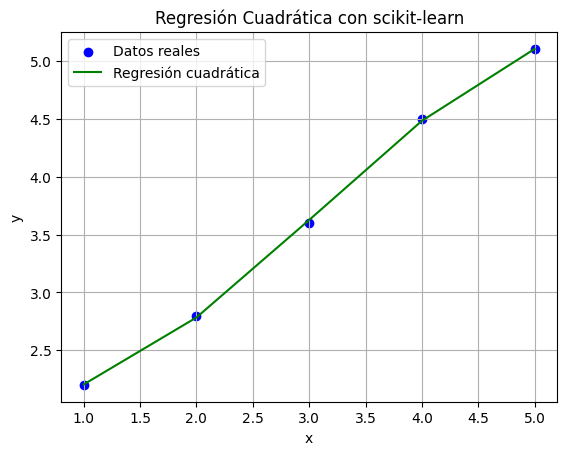

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Creamos un modelo de regresión cuadrática
modelo_cuadratico = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
modelo_cuadratico.fit(x, y)

# Predicción
y_pred_cuadratico = modelo_cuadratico.predict(x)

# Visualización
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(x, y_pred_cuadratico, label="Regresión cuadrática", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Cuadrática con scikit-learn")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Extraer coeficientes del modelo cuadrático
coefs = modelo_cuadratico.named_steps['linearregression'].coef_
intercept = modelo_cuadratico.named_steps['linearregression'].intercept_

# coefs[0] es el término constante del polinomio, se omite
a = coefs[2]
b = coefs[1]
c = intercept

print(f"Modelo cuadrático: y = {a:.4f}x² + {b:.4f}x + {c:.4f}")


Modelo cuadrático: y = 0.3821x² + -0.2762x + 2.1400


In [8]:
from sklearn.metrics import mean_squared_error

# MSE para modelo lineal
mse_lineal = mean_squared_error(y, y_pred_lineal)

# MSE para modelo cuadrático
mse_cuadratico = mean_squared_error(y, y_pred_cuadratico)

print(f"Error cuadrático medio (lineal): {mse_lineal:.4f}")
print(f"Error cuadrático medio (cuadrático): {mse_cuadratico:.4f}")


Error cuadrático medio (lineal): 0.0054
Error cuadrático medio (cuadrático): 0.0003


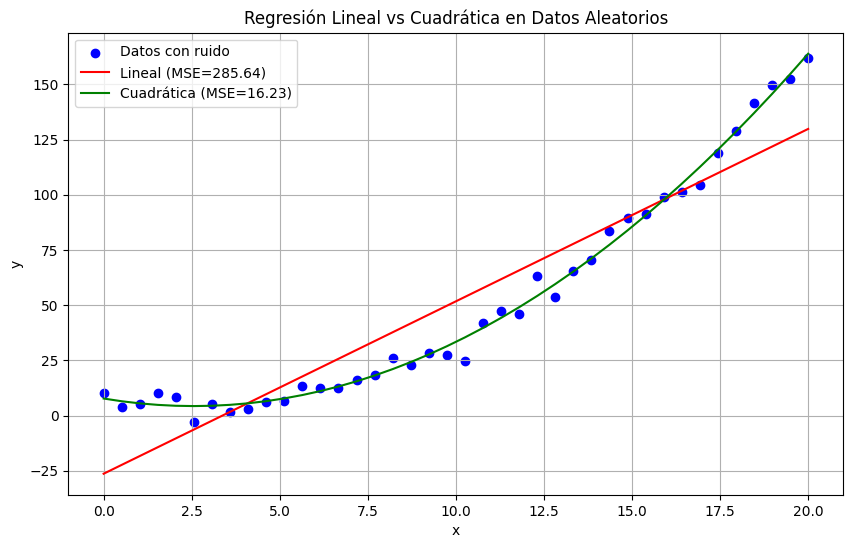

Modelo cuadrático ajustado: y = 0.5242x² + -2.6773x + 7.7591


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 1. Generar datos aleatorios con ruido
np.random.seed(0)  # para reproducibilidad
x = np.linspace(0, 20, 40)
y = 0.5 * x**2 - 2 * x + 3 + np.random.normal(0, 4, size=x.shape)  # cuadrática + ruido

x = x.reshape(-1, 1)  # reshaping para scikit-learn

# 2. Modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(x, y)
y_pred_lineal = modelo_lineal.predict(x)

# 3. Modelo cuadrático
modelo_cuadratico = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo_cuadratico.fit(x, y)
y_pred_cuadratico = modelo_cuadratico.predict(x)

# 4. Errores
mse_lineal = mean_squared_error(y, y_pred_lineal)
mse_cuadratico = mean_squared_error(y, y_pred_cuadratico)

# 5. Visualización
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Datos con ruido", color="blue")
plt.plot(x, y_pred_lineal, label=f"Lineal (MSE={mse_lineal:.2f})", color="red")
plt.plot(x, y_pred_cuadratico, label=f"Cuadrática (MSE={mse_cuadratico:.2f})", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal vs Cuadrática en Datos Aleatorios")
plt.legend()
plt.grid(True)
plt.show()

# 6. Mostrar modelo cuadrático
coefs = modelo_cuadratico.named_steps['linearregression'].coef_
intercept = modelo_cuadratico.named_steps['linearregression'].intercept_
a, b, c = coefs[2], coefs[1], intercept
print(f"Modelo cuadrático ajustado: y = {a:.4f}x² + {b:.4f}x + {c:.4f}")


In [10]:
import numpy as np
import time
import os

# Parámetros
filas, columnas = 10, 10
generaciones = 20
probabilidad_vida = 0.3  # Probabilidad de que una celda inicie viva

# Inicializar el tablero con 0 (muertas) o 1 (vivas)
tablero = np.random.choice([0, 1], size=(filas, columnas), p=[1 - probabilidad_vida, probabilidad_vida])

def contar_vecinos(tablero, x, y):
    total = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            fila = (x + i) % filas
            col = (y + j) % columnas
            total += tablero[fila, col]
    return total

def siguiente_generacion(tablero):
    nuevo_tablero = np.zeros((filas, columnas), dtype=int)
    for i in range(filas):
        for j in range(columnas):
            vecinos = contar_vecinos(tablero, i, j)
            if tablero[i, j] == 1:
                if vecinos == 2 or vecinos == 3:
                    nuevo_tablero[i, j] = 1
            else:
                if vecinos == 3:
                    nuevo_tablero[i, j] = 1
    return nuevo_tablero

# Simulación
for gen in range(generaciones):
    os.system('cls' if os.name == 'nt' else 'clear')
    print(f"Generación {gen + 1}")
    print(tablero)
    tablero = siguiente_generacion(tablero)
    time.sleep(0.5)


Generación 1
[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0]
 [0 1 0 1 0 0 1 0 1 0]
 [1 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 1 0 1]]
Generación 2
[[0 0 0 0 0 1 1 1 1 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [1 1 1 0 1 1 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 1]
 [0 1 1 1 0 0 0 0 0 0]
 [0 1 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]]
Generación 3
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Generación 4
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
Generación 5
[[0 0 0 0 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros del tablero
filas, columnas = 50, 50
probabilidad_vida = 0.2

# Inicializar el tablero aleatoriamente
tablero = np.random.choice([0, 1], size=(filas, columnas), p=[1 - probabilidad_vida, probabilidad_vida])

def contar_vecinos(tablero, x, y):
    vecinos = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            fila = (x + i) % filas
            col = (y + j) % columnas
            vecinos += tablero[fila, col]
    return vecinos

def actualizar(frame_num, img, tablero):
    nuevo_tablero = np.zeros((filas, columnas), dtype=int)
    for i in range(filas):
        for j in range(columnas):
            vecinos = contar_vecinos(tablero, i, j)
            if tablero[i, j] == 1:
                if vecinos == 2 or vecinos == 3:
                    nuevo_tablero[i, j] = 1
            else:
                if vecinos == 3:
                    nuevo_tablero[i, j] = 1
    img.set_data(nuevo_tablero)
    tablero[:] = nuevo_tablero
    return img,

# Crear la figura
fig, ax = plt.subplots()
img = ax.imshow(tablero, interpolation='nearest', cmap='gray')
ani = animation.FuncAnimation(fig, actualizar, fargs=(img, tablero), frames=100, interval=100, save_count=50)

plt.title("Juego de la Vida de Conway")
plt.axis('off')
plt.show()


C:\Users\MCarrilloL\AppData\Local\Temp\ipykernel_16524\3899541713.py:47: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=100.
  ani = animation.FuncAnimation(fig, actualizar, fargs=(img, tablero), frames=100, interval=200, save_count=50)


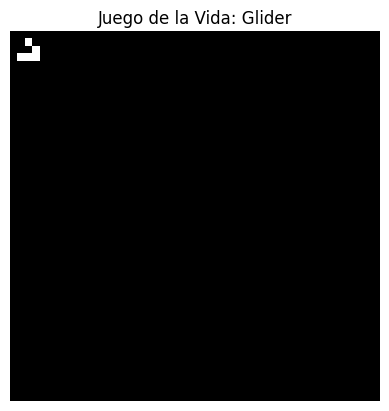

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros del tablero
filas, columnas = 50, 50
tablero = np.zeros((filas, columnas), dtype=int)

# Insertar el patrón "glider" en una posición inicial (fila=1, col=1)
glider = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 1]])

# Ubicación inicial del glider
fila_inicio, col_inicio = 1, 1
tablero[fila_inicio:fila_inicio+3, col_inicio:col_inicio+3] = glider

def contar_vecinos(tablero, x, y):
    vecinos = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            fila = (x + i) % filas
            col = (y + j) % columnas
            vecinos += tablero[fila, col]
    return vecinos

def actualizar(frame_num, img, tablero):
    nuevo_tablero = np.zeros((filas, columnas), dtype=int)
    for i in range(filas):
        for j in range(columnas):
            vecinos = contar_vecinos(tablero, i, j)
            if tablero[i, j] == 1:
                if vecinos == 2 or vecinos == 3:
                    nuevo_tablero[i, j] = 1
            else:
                if vecinos == 3:
                    nuevo_tablero[i, j] = 1
    img.set_data(nuevo_tablero)
    tablero[:] = nuevo_tablero
    return img,

# Crear figura y animación
fig, ax = plt.subplots()
img = ax.imshow(tablero, interpolation='nearest', cmap='gray')
ani = animation.FuncAnimation(fig, actualizar, fargs=(img, tablero), frames=100, interval=200, save_count=50)

plt.title("Juego de la Vida: Glider")
plt.axis('off')
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# %matplotlib inline  # <-- en notebooks locales
# Para Colab o Jupyter asegúrate de esto:
%matplotlib inline

# Parámetros
filas, columnas = 50, 50
tablero = np.zeros((filas, columnas), dtype=int)

# Patrón glider
glider = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 1]])
tablero[1:4, 1:4] = glider

def contar_vecinos(tablero, x, y):
    vecinos = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            vecinos += tablero[(x+i) % filas, (y+j) % columnas]
    return vecinos

def actualizar(frame_num, img, tablero):
    nuevo_tablero = np.zeros((filas, columnas), dtype=int)
    for i in range(filas):
        for j in range(columnas):
            vecinos = contar_vecinos(tablero, i, j)
            if tablero[i, j] == 1 and vecinos in [2, 3]:
                nuevo_tablero[i, j] = 1
            elif tablero[i, j] == 0 and vecinos == 3:
                nuevo_tablero[i, j] = 1
    img.set_data(nuevo_tablero)
    tablero[:] = nuevo_tablero
    return img,

# Crear figura y animación
fig, ax = plt.subplots()
img = ax.imshow(tablero, interpolation='nearest', cmap='gray')
plt.axis('off')

ani = animation.FuncAnimation(fig, actualizar, fargs=(img, tablero), frames=100, interval=200)

# Mostrar animación en Jupyter / Colab
HTML(ani.to_jshtml())


C:\Users\MCarrilloL\AppData\Roaming\Python\Python312\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parámetros del tablero
filas, columnas = 60, 80
tablero = np.zeros((filas, columnas), dtype=int)

# Definir el patrón de la Gosper Glider Gun
def agregar_gosper_gun(tablero, x=1, y=1):
    coords = [
        (5,1), (5,2), (6,1), (6,2),
        (5,11), (6,11), (7,11),
        (4,12), (8,12),
        (3,13), (9,13), (3,14), (9,14),
        (6,15),
        (4,16), (8,16),
        (5,17), (6,17), (7,17),
        (6,18),
        (3,21), (4,21), (5,21),
        (3,22), (4,22), (5,22),
        (2,23), (6,23),
        (1,25), (2,25), (6,25), (7,25),
        (3,35), (4,35), (3,36), (4,36)
    ]
    for dx, dy in coords:
        tablero[x+dx, y+dy] = 1

# Insertar la Glider Gun
agregar_gosper_gun(tablero, x=1, y=1)

def contar_vecinos(tablero, x, y):
    return sum(tablero[(x+i)%filas, (y+j)%columnas]
               for i in [-1, 0, 1] for j in [-1, 0, 1]
               if not (i == 0 and j == 0))

def actualizar(frame_num, img, tablero):
    nuevo_tablero = np.zeros((filas, columnas), dtype=int)
    for i in range(filas):
        for j in range(columnas):
            vecinos = contar_vecinos(tablero, i, j)
            if tablero[i, j] == 1 and vecinos in [2, 3]:
                nuevo_tablero[i, j] = 1
            elif tablero[i, j] == 0 and vecinos == 3:
                nuevo_tablero[i, j] = 1
    img.set_data(nuevo_tablero)
    tablero[:] = nuevo_tablero
    return img,

# Configurar figura y animación
fig, ax = plt.subplots()
img = ax.imshow(tablero, interpolation='nearest', cmap='gray')
plt.axis('off')
ani = animation.FuncAnimation(fig, actualizar, fargs=(img, tablero), frames=200, interval=100)

# Mostrar en Jupyter o Colab
HTML(ani.to_jshtml())


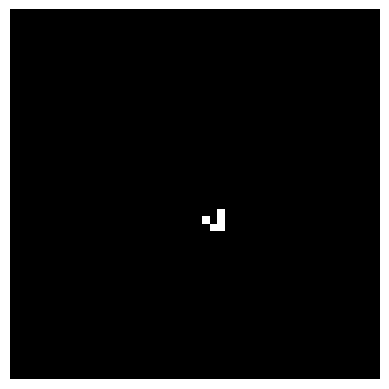

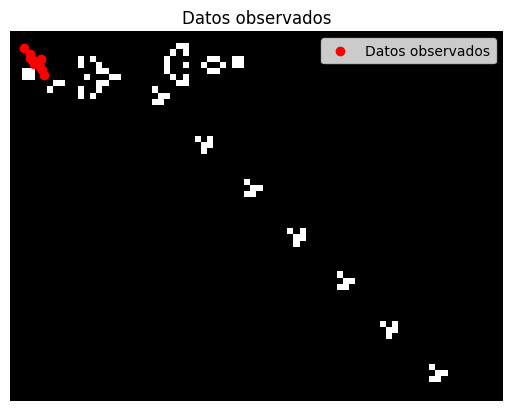

In [14]:
#Aplicación mínimos cuadrados (lineal)
# Un experimento produce los siguientes pares de datos

#x = 1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99
#y = 2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57

#En donde los valores de x tienen un valor exacto pero cada valor de la ordenada (y) se ha medido con una
#precisión de sigma=0.5 (desviación estándar). Suponiendo que  que el modelo adecuado para los datos
#es una línea recta (y=mx+b), calcule mediante mínimos cuadrados una estimación para m (pendiente) y para b (ordenada al origen
#y calcula el error para cada estimación.

import numpy as np
import matplotlib.pyplot as plt

# Datos

x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99]) #valores exactos
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57]) #valores con sigma=0.5

#suponemos que el modelo es lineal, y=mx+b. Calcule mediante el método de mínimos cuadrados una estimación de la pendiente m y la ordenada al origen b
#y calcule el error para cada estimación (de m y b)
n = len(x)

plt.scatter(x,y, color='red', label="Datos observados")
plt.title("Datos observados")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

In [15]:
import numpy as np

# Datos
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])
n = len(x)

# Cálculos base
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

# Estimación de m y b (mínimos cuadrados)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# Predicciones y residuales
y_pred = m * x + b
residuals = y - y_pred

# Error cuadrático medio
mse = np.mean(residuals**2)

# Estimación de la varianza de los errores
s2 = np.sum(residuals**2) / (n - 2)

# Desviación estándar de m y b
x_mean = np.mean(x)
Sxx = np.sum((x - x_mean)**2)

sigma_m = np.sqrt(s2 / Sxx)
sigma_b = np.sqrt(s2 * (1/n + x_mean**2 / Sxx))

# Resultados
print(f"Recta estimada: y = {m:.4f}x + {b:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Desviación estándar de m: {sigma_m:.4f}")
print(f"Desviación estándar de b: {sigma_b:.4f}")


Recta estimada: y = 1.1091x + 0.3887
Error cuadrático medio (MSE): 0.2874
Desviación estándar de m: 0.1988
Desviación estándar de b: 0.7411


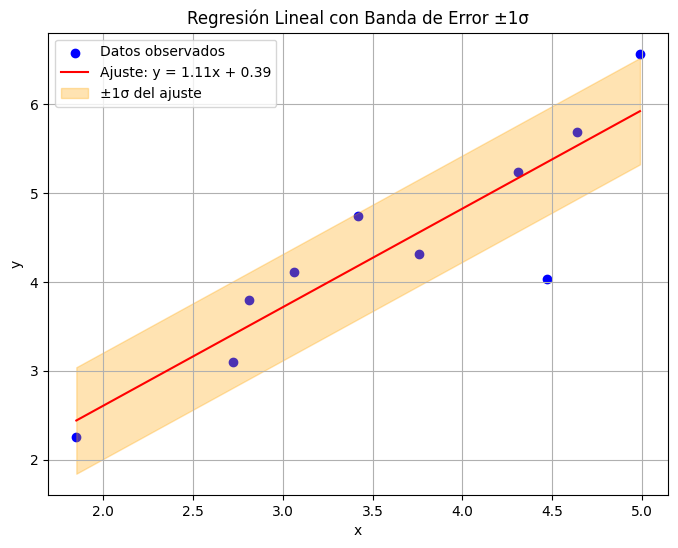

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])
n = len(x)

# Estimaciones de m y b
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# Predicción y residuales
y_pred = m * x + b
residuals = y - y_pred

# Error cuadrático medio y varianza residual
s2 = np.sum(residuals**2) / (n - 2)
sigma = np.sqrt(s2)

# Recta ajustada y bandas ±1σ
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = m * x_line + b
y_upper = y_line + sigma
y_lower = y_line - sigma

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados", color="blue")
plt.plot(x_line, y_line, label=f"Ajuste: y = {m:.2f}x + {b:.2f}", color="red")
plt.fill_between(x_line, y_lower, y_upper, color='orange', alpha=0.3, label="±1σ del ajuste")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal con Banda de Error ±1σ")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np

# Datos
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])

# 1. Construir matriz de diseño X (agrega columna de unos para el intercepto)
X = np.vstack([np.ones_like(x), x]).T  # dimensión (n, 2)

# 2. Convertir y a vector columna
y = y.reshape(-1, 1)  # dimensión (n, 1)

# 3. Resolver: beta = (X^T X)^(-1) X^T y
XtX = X.T @ X
XtY = X.T @ y
beta_hat = np.linalg.inv(XtX) @ XtY  # vector de parámetros [b, m]

# Mostrar resultados
b = beta_hat[0, 0]
m = beta_hat[1, 0]
print(f"Estimación matricial: y = {m:.4f}x + {b:.4f}")


Estimación matricial: y = 1.1091x + 0.3887


In [18]:
import numpy as np

# Datos
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])

# Matriz X (columna de unos y columna de x)
X = np.vstack([np.ones_like(x), x]).T
y = y.reshape(-1, 1)  # vector columna

print("Matriz X:\n", X)
print("\nVector y:\n", y)


Matriz X:
 [[1.   1.85]
 [1.   2.72]
 [1.   2.81]
 [1.   3.06]
 [1.   3.42]
 [1.   3.76]
 [1.   4.31]
 [1.   4.47]
 [1.   4.64]
 [1.   4.99]]

Vector y:
 [[2.26]
 [3.1 ]
 [3.8 ]
 [4.11]
 [4.74]
 [4.31]
 [5.24]
 [4.03]
 [5.69]
 [6.57]]


In [19]:
XtX = X.T @ X
Xty = X.T @ y

print("X^T * X:\n", XtX)
print("\nX^T * y:\n", Xty)


X^T * X:
 [[ 10.      36.03  ]
 [ 36.03   138.9013]]

X^T * y:
 [[ 43.85  ]
 [168.0684]]


In [20]:
beta_hat = np.linalg.inv(XtX) @ Xty
b = beta_hat[0, 0]
m = beta_hat[1, 0]

print(f"\nEstimación de parámetros:")
print(f"b (intercepto) = {b:.4f}")
print(f"m (pendiente)  = {m:.4f}")



Estimación de parámetros:
b (intercepto) = 0.3887
m (pendiente)  = 1.1091


In [21]:
# Paso 1: predicciones
y_pred = m * x + b
residuals = y.flatten() - y_pred  # residuales

# Paso 2: chi-cuadrado reducido
sigma = 0.5
chi2 = np.sum((residuals / sigma)**2)
chi2_reduced = chi2 / (len(x) - 2)  # grados de libertad = n - 2

print(f"Chi-cuadrado total: {chi2:.4f}")
print(f"Chi-cuadrado reducido: {chi2_reduced:.4f}")


Chi-cuadrado total: 11.4957
Chi-cuadrado reducido: 1.4370


In [22]:
# Promedio de x
x_mean = np.mean(x)

# Sxx = sumatoria de (x_i - x̄)^2
Sxx = np.sum((x - x_mean)**2)

# Desviación estándar conocida
sigma_known = 0.5
n = len(x)

# Cálculo de errores estándar
sigma_m = sigma_known / np.sqrt(Sxx)
sigma_b = sigma_known * np.sqrt(1/n + (x_mean**2) / Sxx)

print(f"Desviación estándar conocida: σ = {sigma_known}")
print(f"Error estándar de la pendiente (m): σ_m = {sigma_m:.4f}")
print(f"Error estándar del intercepto (b): σ_b = {sigma_b:.4f}")


Desviación estándar conocida: σ = 0.5
Error estándar de la pendiente (m): σ_m = 0.1659
Error estándar del intercepto (b): σ_b = 0.6182


In [23]:


# Matriz de diseño X (ya la habíamos construido)
X = np.vstack([np.ones_like(x), x]).T
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)

# Desviación estándar conocida
sigma2 = sigma_known**2

# Matriz de covarianza
cov_beta = sigma2 * XtX_inv

# Errores estándar
sigma_b = np.sqrt(cov_beta[0, 0])
sigma_m = np.sqrt(cov_beta[1, 1])

# Mostrar resultados
print("Matriz de covarianza de los parámetros:\n", cov_beta)
print(f"\nError estándar de b (intercepto): σ_b = {sigma_b:.4f}")
print(f"Error estándar de m (pendiente):  σ_m = {sigma_m:.4f}")
print(f"Covarianza entre b y m: {cov_beta[0, 1]:.4f}")


Matriz de covarianza de los parámetros:
 [[ 0.38221819 -0.09914465]
 [-0.09914465  0.02751725]]

Error estándar de b (intercepto): σ_b = 0.6182
Error estándar de m (pendiente):  σ_m = 0.1659
Covarianza entre b y m: -0.0991


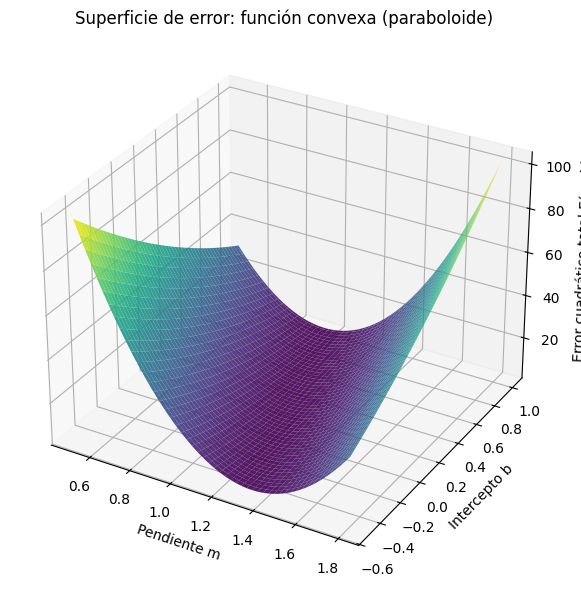

In [2]:
# Reimportar bibliotecas después del reinicio
import numpy as np
import matplotlib.pyplot as plt

# Crear una rejilla de valores de m y b para evaluar la función de error
m_vals = np.linspace(0.5, 1.8, 100)
b_vals = np.linspace(-0.5, 1.0, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Datos originales
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])

# Calcular el error cuadrático total E(m, b) para cada par (m, b)
def error_total(m, b, x, y):
    y_pred = m * x[:, np.newaxis, np.newaxis] + b
    residuals = y[:, np.newaxis, np.newaxis] - y_pred
    return np.sum(residuals**2, axis=0)

E = error_total(M, B, x, y)

# Graficar la superficie del error
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, E, cmap='viridis', alpha=0.9)
ax.set_xlabel('Pendiente m')
ax.set_ylabel('Intercepto b')
ax.set_zlabel('Error cuadrático total E(m, b)')
ax.set_title('Superficie de error: función convexa (paraboloide)')
plt.tight_layout()
plt.show()


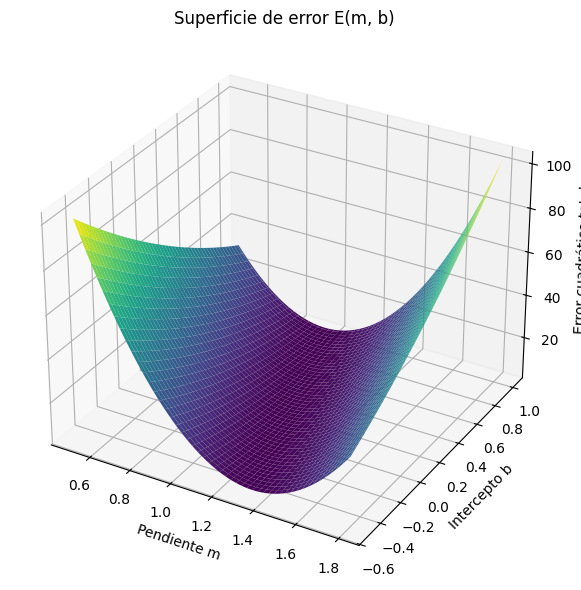

In [3]:
# Usa esto solo en Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

# Datos originales
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])

# Rango de m y b
m_vals = np.linspace(0.5, 1.8, 100)
b_vals = np.linspace(-0.5, 1.0, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Calcular E(m, b)
def error_total(m, b, x, y):
    y_pred = m * x[:, np.newaxis, np.newaxis] + b
    residuals = y[:, np.newaxis, np.newaxis] - y_pred
    return np.sum(residuals**2, axis=0)

E = error_total(M, B, x, y)

# Gráfica interactiva
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(M, B, E, cmap='viridis', edgecolor='none')
ax.set_xlabel('Pendiente m')
ax.set_ylabel('Intercepto b')
ax.set_zlabel('Error cuadrático total')
ax.set_title('Superficie de error E(m, b)')
plt.tight_layout()
plt.show()


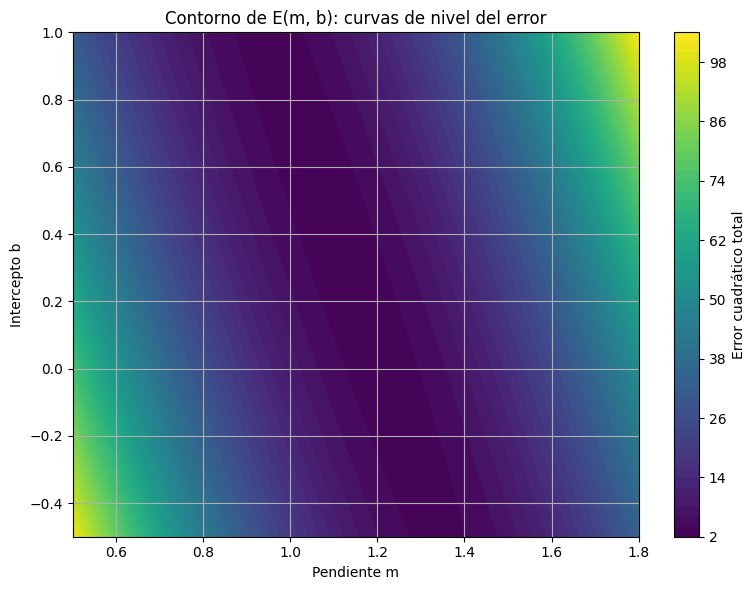

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
x = np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99])
y = np.array([2.26, 3.10, 3.80, 4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57])

# Rango de m y b
m_vals = np.linspace(0.5, 1.8, 100)
b_vals = np.linspace(-0.5, 1.0, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Calcular E(m, b)
def error_total(m, b, x, y):
    y_pred = m * x[:, np.newaxis, np.newaxis] + b
    residuals = y[:, np.newaxis, np.newaxis] - y_pred
    return np.sum(residuals**2, axis=0)

E = error_total(M, B, x, y)

# Gráfico de contorno (curvas de nivel)
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, B, E, levels=50, cmap='viridis')
plt.colorbar(contour, label='Error cuadrático total')
plt.xlabel('Pendiente m')
plt.ylabel('Intercepto b')
plt.title('Contorno de E(m, b): curvas de nivel del error')
plt.grid(True)
plt.tight_layout()
plt.show()


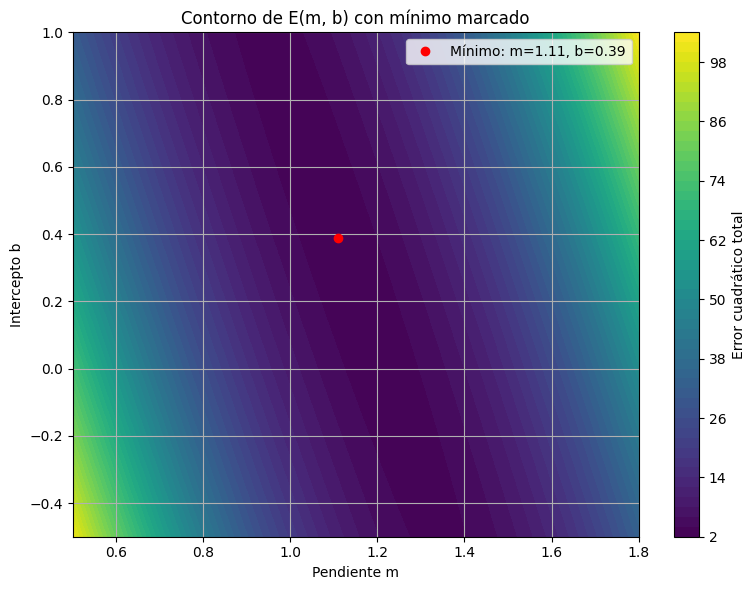

In [5]:
# Estimar los parámetros óptimos usando mínimos cuadrados
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

m_opt = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b_opt = (sum_y - m_opt * sum_x) / n

# Rehacer la gráfica de contorno con punto mínimo
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, B, E, levels=50, cmap='viridis')
plt.colorbar(contour, label='Error cuadrático total')
plt.plot(m_opt, b_opt, 'ro', label=f'Mínimo: m={m_opt:.2f}, b={b_opt:.2f}')
plt.xlabel('Pendiente m')
plt.ylabel('Intercepto b')
plt.title('Contorno de E(m, b) con mínimo marcado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


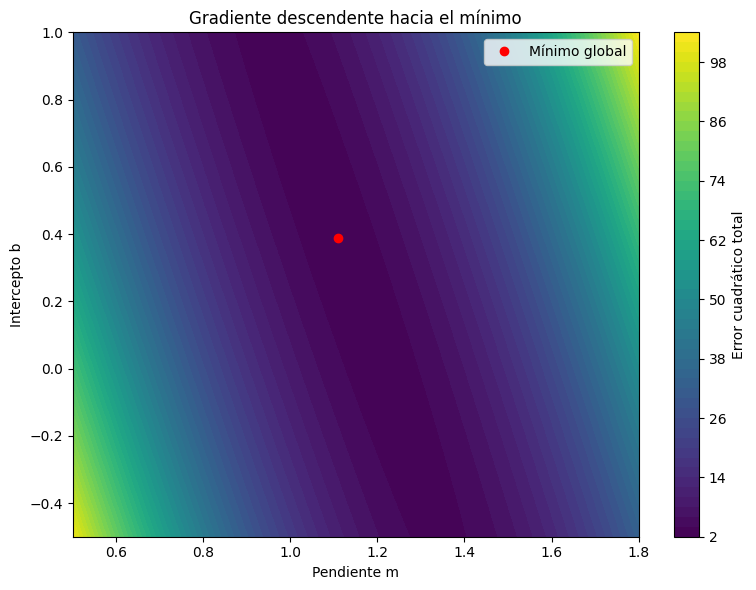

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Función de gradiente del error con respecto a m y b
def gradiente(m, b, x, y):
    n = len(x)
    y_pred = m * x + b
    error = y - y_pred
    dm = -2 * np.sum(x * error)
    db = -2 * np.sum(error)
    return dm / n, db / n

# Parámetros iniciales
m_gd, b_gd = 0.5, -0.5
learning_rate = 0.01
iterations = 50
params = [(m_gd, b_gd)]

# Ejecutar gradiente descendente
for _ in range(iterations):
    dm, db = gradiente(m_gd, b_gd, x, y)
    m_gd -= learning_rate * dm
    b_gd -= learning_rate * db
    params.append((m_gd, b_gd))

# Separar trayectoria
m_path, b_path = zip(*params)

# Crear animación sobre la gráfica de contornos
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(M, B, E, levels=50, cmap='viridis')
plt.colorbar(contour, label='Error cuadrático total')
ax.plot(m_opt, b_opt, 'ro', label='Mínimo global')
point, = ax.plot([], [], 'wo', markersize=6)
path, = ax.plot([], [], 'w--', alpha=0.6)

def init():
    point.set_data([], [])
    path.set_data([], [])
    return point, path

def update(frame):
    point.set_data(m_path[frame], b_path[frame])
    path.set_data(m_path[:frame+1], b_path[:frame+1])
    return point, path

ani = animation.FuncAnimation(fig, update, frames=len(m_path),
                              init_func=init, interval=200, blit=True)

ax.set_xlabel('Pendiente m')
ax.set_ylabel('Intercepto b')
ax.set_title('Gradiente descendente hacia el mínimo')
ax.legend()
plt.tight_layout()
plt.show()
